In [ ]:
# Install dependencies if needed
# Upload the excel file with this "/content/Dairy_Modeling_Data.xlsx"
!pip install pandas openpyxl

import pandas as pd
import numpy as np

# Define file path (Ensure the file is in /content/)
file_path = "/content/Dairy_Modeling_Data.xlsx"

# Load the Excel file
xls = pd.ExcelFile(file_path)

# Load the sheet named 'dairyplan25'
df_dairy = pd.read_excel(xls, sheet_name='dairyplan25')

# Extract Column J17 to J216 (Columns 9 to 208 in Python since index starts at 0)
column_J_values = df_dairy.iloc[:, 9:209].dropna().astype(float)  # Ensure numeric values

# Define constants from the spreadsheet
L11 = 588  # Max body weight (kg)
L10 = 1.0  # Multiplier (100%)
birth_weight = 50  # Minimum weight (kg)

# Define the function based on the equation from the spreadsheet
def predict_heifer_body_weight(J_values):
    """
    Compute predicted J values using the given equation.
    :param J_values: List or array of input values (e.g., days or weeks)
    :return: List of predicted heifer body weights
    """
    J_values = np.array(J_values)  # Convert input to NumPy array
    predicted_weights = np.minimum(
        np.maximum(birth_weight, 28.115 + 6.2692 * J_values - 0.0117 * J_values**2), L11
    ) * L10  # Apply the equation
    return predicted_weights.tolist()  # Convert NumPy array to list

# Example: Predicting weights for a list of J values (e.g., weeks * 7)
J_values_list = np.arange(1, 201)  # Simulate for 200 time steps (adjust as needed)
predicted_J_values = predict_heifer_body_weight(J_values_list)

# Print the list of predicted values
print(predicted_J_values)



[50.0, 50.0, 50.0, 53.0046, 59.1685, 65.309, 71.42609999999999, 77.51979999999999, 83.59009999999999, 89.63699999999999, 95.66049999999998, 101.6606, 107.6373, 113.5906, 119.5205, 125.427, 131.31009999999998, 137.1698, 143.00609999999998, 148.819, 154.60850000000002, 160.3746, 166.1173, 171.8366, 177.5325, 183.205, 188.8541, 194.4798, 200.0821, 205.661, 211.2165, 216.7486, 222.25730000000001, 227.74259999999998, 233.2045, 238.643, 244.0581, 249.44979999999995, 254.81809999999996, 260.163, 265.48449999999997, 270.7826, 276.0573, 281.30859999999996, 286.5365, 291.741, 296.9221, 302.07980000000003, 307.2141, 312.325, 317.4125, 322.4766, 327.5173, 332.53459999999995, 337.5285, 342.499, 347.4461, 352.36979999999994, 357.27009999999996, 362.147, 367.0005, 371.83059999999995, 376.6373, 381.4206, 386.1805, 390.91700000000003, 395.63009999999997, 400.3198, 404.98609999999996, 409.629, 414.2485, 418.84459999999996, 423.41729999999995, 427.96659999999997, 432.4925, 436.99499999999995, 441.4740999

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


[50.0, 50.0, 50.0, 53.0046, 59.1685, 65.309, 71.42609999999999, 77.51979999999999, 83.59009999999999, 89.63699999999999, 95.66049999999998, 101.6606, 107.6373, 113.5906, 119.5205, 125.427, 131.31009999999998, 137.1698, 143.00609999999998, 148.819, 154.60850000000002, 160.3746, 166.1173, 171.8366, 177.5325, 183.205, 188.8541, 194.4798, 200.0821, 205.661, 211.2165, 216.7486, 222.25730000000001, 227.74259999999998, 233.2045, 238.643, 244.0581, 249.44979999999995, 254.81809999999996, 260.163, 265.48449999999997, 270.7826, 276.0573, 281.30859999999996, 286.5365, 291.741, 296.9221, 302.07980000000003, 307.2141, 312.325, 317.4125, 322.4766, 327.5173, 332.53459999999995, 337.5285, 342.499, 347.4461, 352.36979999999994, 357.27009999999996, 362.147, 367.0005, 371.83059999999995, 376.6373, 381.4206, 386.1805, 390.91700000000003, 395.63009999999997, 400.3198, 404.98609999999996, 409.629, 414.2485, 418.84459999999996, 423.41729999999995, 427.96659999999997, 432.4925, 436.99499999999995, 441.4740999

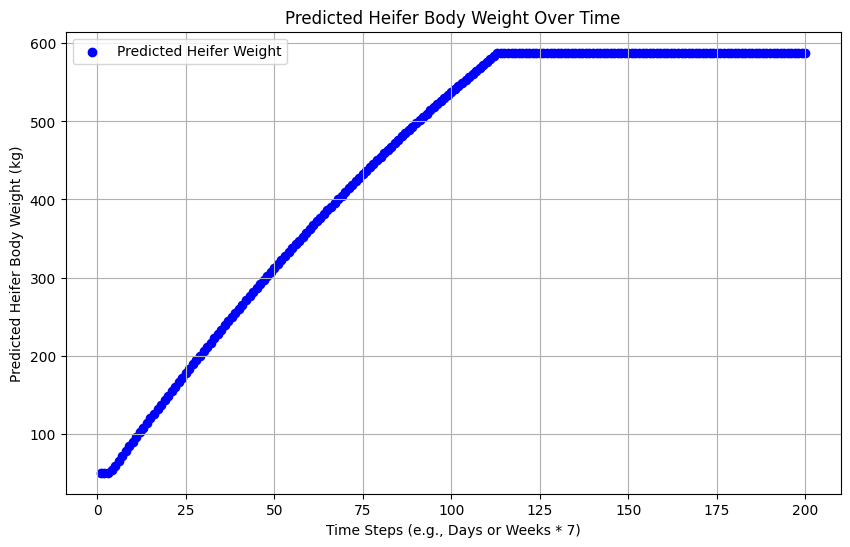

In [ ]:


# Example: Predicting weights for a list of J values (e.g., weeks * 7)
J_values_list = np.arange(1, 201)  # Simulate for 200 time steps (adjust as needed)
predicted_J_values = predict_heifer_body_weight(J_values_list)

# Print the list of predicted values
print(predicted_J_values)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(J_values_list, predicted_J_values, label="Predicted Heifer Weight", color="blue")

# Customize the plot
plt.xlabel("Time Steps (e.g., Days or Weeks * 7)")
plt.ylabel("Predicted Heifer Body Weight (kg)")
plt.title("Predicted Heifer Body Weight Over Time")
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
!pip install ace_tools # Install the ace_tools package

import pandas as pd

# Creating the DataFrame from the provided data
data = {
    "week": list(range(1, 201)),
    "day": [4 + (i - 1) * 7 for i in range(1, 201)],
    "age_lact1": [734 + (i - 1) * 7 for i in range(1, 201)],
    "f_age_lact1": [round(543 + (i * 0.5), 2) if i < 150 else 599.62 for i in range(1, 201)],
    "f_lactation_lact1": [round(3.15 - (i * 0.02), 2) if i < 100 else 0.00 for i in range(1, 201)],
    "age_lact2": [1204 + (i - 1) * 7 for i in range(1, 201)],
    "f_age_lact2": [round(639.17 + (i * 0.03), 2) for i in range(1, 201)],
    "f_lactation_lact2": [round(5.87 - (i * 0.03), 2) if i < 100 else 0.00 for i in range(1, 201)],
    "t_pc": [round(i * 0.01, 2) if i < 100 else 0.00 for i in range(1, 201)],
    "bwpreg_lact1": [round(538 - (i * 0.5), 2) if i < 100 else 600 for i in range(1, 201)],
    "bwopen_lact2": [round(633 - (i * 0.3), 2) if i < 100 else 640 for i in range(1, 201)]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

     week   day  age_lact1  f_age_lact1  f_lactation_lact1  age_lact2  \
0       1     4        734       543.50               3.13       1204   
1       2    11        741       544.00               3.11       1211   
2       3    18        748       544.50               3.09       1218   
3       4    25        755       545.00               3.07       1225   
4       5    32        762       545.50               3.05       1232   
..    ...   ...        ...          ...                ...        ...   
195   196  1369       2099       599.62               0.00       2569   
196   197  1376       2106       599.62               0.00       2576   
197   198  1383       2113       599.62               0.00       2583   
198   199  1390       2120       599.62               0.00       2590   
199   200  1397       2127       599.62               0.00       2597   

     f_age_lact2  f_lactation_lact2  t_pc  bwpreg_lact1  bwopen_lact2  
0         639.20               5.84  0.01         5

In [ ]:
#  add predicted J_values as a column in teh dataframe titles Heifer BW

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Assuming 'predicted_J_values' is already calculated

# Add the predicted J values as a new column to the DataFrame
df['Predicted_Heifer_BW'] = predicted_J_values

# Display the updated DataFrame with the new column
df


,Predicted_J_values,week,day,age_lact1,f_age_lact1,f_lactation_lact1,age_lact2,f_age_lact2,f_lactation_lact2,t_pc,bwpreg_lact1,bwopen_lact2,Predicted_Heifer_BW
0,50.0000,1,4,734,543.50,3.13,1204,639.20,5.84,0.01,537.5,632.7,50.0000
1,50.0000,2,11,741,544.00,3.11,1211,639.23,5.81,0.02,537.0,632.4,50.0000
2,50.0000,3,18,748,544.50,3.09,1218,639.26,5.78,0.03,536.5,632.1,50.0000
3,53.0046,4,25,755,545.00,3.07,1225,639.29,5.75,0.04,536.0,631.8,53.0046
4,59.1685,5,32,762,545.50,3.05,1232,639.32,5.72,0.05,535.5,631.5,59.1685
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,588.0000,196,1369,2099,599.62,0.00,2569,645.05,0.00,0.00,600.0,640.0,588.0000
196,588.0000,197,1376,2106,599.62,0.00,2576,645.08,0.00,0.00,600.0,640.0,588.0000
197,588.0000,198,1383,2113,599.62,0.00,2583,645.11,0.00,0.00,600.0,640.0,588.0000
198,588.0000,199,1390,2120,599.62,0.00,2590,645.14,0.00,0.00,600.0,640.0,588.0000


In [ ]:
import pandas as pd

# Creating the dataframe
data = {
    "Lac1": [4.91, 4.88, 5.05, 5.22, 5.38, 5.51, 5.63, 5.73, 5.81, 5.89, 5.95, 6.00, 6.05, 6.10, 6.14, 6.17, 6.21, 6.24, 6.27, 6.30,
             6.33, 6.35, 6.38, 6.41, 6.44, 6.47, 6.50, 6.52, 6.55, 6.58, 6.61, 6.64, 6.68, 6.71, 6.74, 6.77, 6.81, 6.84, 6.88, 6.91,
             6.95, 6.98, 7.02, 7.06, 7.10, 7.14, 7.18, 7.22, 7.26, 7.30, 7.35, 7.39, 7.43, 7.48, 7.52, 7.57, 7.62, 7.67, 7.71, 7.76,
             7.81, 7.86, 7.92, 7.97, 8.02, 8.07, 8.13, 8.18, 8.24, 8.30, 8.35, 8.41, 8.47, 8.53, 8.59, 8.65, 8.72, 8.78, 8.84, 8.91,
             8.98, 9.04, 9.11, 9.18, 9.25, 9.32, 9.39, 9.46, 9.54, 9.61, 9.69, 9.77, 9.84, 9.92, 10.00, 10.08, 10.16, 10.25, 10.33, 10.42,
             10.50, 10.59, 10.68, 10.77],

    "Lac2": [4.20, 4.29, 4.49, 4.69, 4.86, 5.01, 5.14, 5.26, 5.36, 5.45, 5.53, 5.60, 5.67, 5.74, 5.80, 5.85, 5.91, 5.96, 6.02, 6.07,
             6.12, 6.17, 6.23, 6.28, 6.33, 6.39, 6.45, 6.50, 6.56, 6.62, 6.68, 6.74, 6.80, 6.86, 6.93, 6.99, 7.06, 7.13, 7.20, 7.27,
             7.35, 7.42, 7.50, 7.57, 7.65, 7.73, 7.82, 7.90, 7.99, 8.08, 8.17, 8.26, 8.35, 8.45, 8.54, 8.64, 8.74, 8.85, 8.95, 9.06,
             9.17, 9.28, 9.40, 9.52, 9.64, 9.76, 9.88, 10.01, 10.14, 10.27, 10.41, 10.54, 10.69, 10.83, 10.98, 11.13, 11.28, 11.43, 11.59, 11.76,
             11.92, 12.09, 12.26, 12.44, 12.62, 12.80, 12.99, 13.18, 13.38, 13.57, 13.78, 13.99, 14.20, 14.41, 14.63, 14.86, 15.09, 15.32, 15.56, 15.81,
             16.06, 16.31, 16.57, 16.84]
}

df_new = pd.DataFrame(data)

# Display the dataframe
print(df_new)


      Lac1   Lac2
0     4.91   4.20
1     4.88   4.29
2     5.05   4.49
3     5.22   4.69
4     5.38   4.86
..     ...    ...
99   10.42  15.81
100  10.50  16.06
101  10.59  16.31
102  10.68  16.57
103  10.77  16.84

[104 rows x 2 columns]


In [ ]:
#  Add df_new to df

import pandas as pd
# Concatenate the two dataframes
df = pd.concat([df, df_new], axis=1)

# Display the updated dataframe
df


,Predicted_J_values,week,day,age_lact1,f_age_lact1,f_lactation_lact1,age_lact2,f_age_lact2,f_lactation_lact2,t_pc,bwpreg_lact1,bwopen_lact2,Predicted_Heifer_BW,Lac1,Lac2
0,50.0000,1,4,734,543.50,3.13,1204,639.20,5.84,0.01,537.5,632.7,50.0000,4.91,4.20
1,50.0000,2,11,741,544.00,3.11,1211,639.23,5.81,0.02,537.0,632.4,50.0000,4.88,4.29
2,50.0000,3,18,748,544.50,3.09,1218,639.26,5.78,0.03,536.5,632.1,50.0000,5.05,4.49
3,53.0046,4,25,755,545.00,3.07,1225,639.29,5.75,0.04,536.0,631.8,53.0046,5.22,4.69
4,59.1685,5,32,762,545.50,3.05,1232,639.32,5.72,0.05,535.5,631.5,59.1685,5.38,4.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,588.0000,196,1369,2099,599.62,0.00,2569,645.05,0.00,0.00,600.0,640.0,588.0000,NaN,NaN
196,588.0000,197,1376,2106,599.62,0.00,2576,645.08,0.00,0.00,600.0,640.0,588.0000,NaN,NaN
197,588.0000,198,1383,2113,599.62,0.00,2583,645.11,0.00,0.00,600.0,640.0,588.0000,NaN,NaN
198,588.0000,199,1390,2120,599.62,0.00,2590,645.14,0.00,0.00,600.0,640.0,588.0000,NaN,NaN


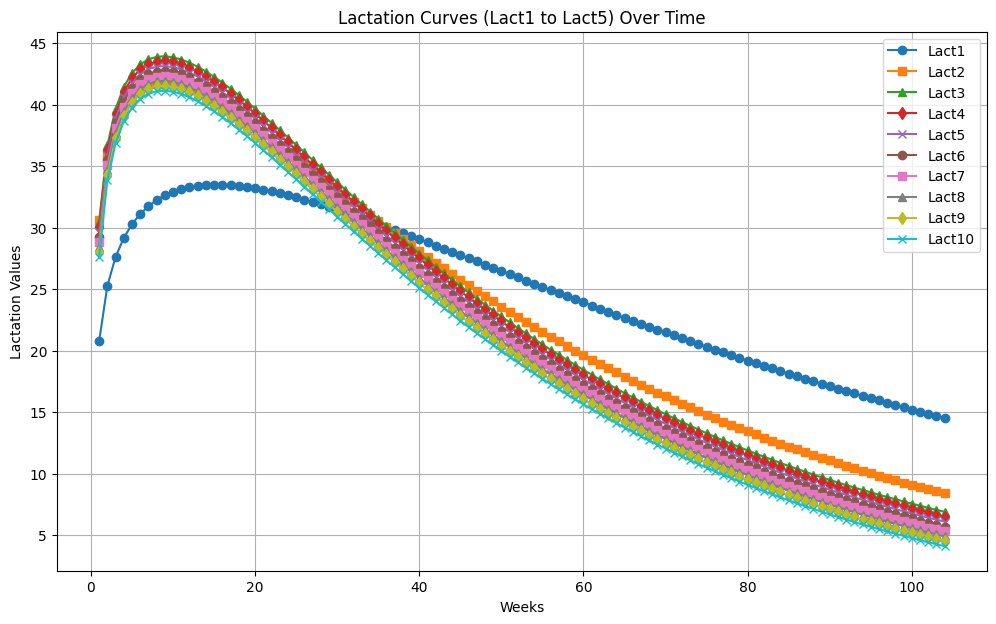

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define weeks
weeks = list(range(1, 105))

# Define lactation values
lact1 = [20.77, 25.27, 27.61, 29.16, 30.27, 31.10, 31.74, 32.23, 32.62, 32.91, 33.13, 33.29, 33.40, 33.46, 33.49, 33.48, 33.45, 33.39, 33.31, 33.20, 33.08, 32.95, 32.80, 32.63, 32.46, 32.27, 32.08, 31.88, 31.67, 31.45, 31.23, 31.00, 30.77, 30.54, 30.30, 30.05, 29.81, 29.56, 29.31, 29.05, 28.80, 28.54, 28.29, 28.03, 27.77, 27.51, 27.25, 26.99, 26.73, 26.47, 26.21, 25.95, 25.69, 25.44, 25.18, 24.92, 24.67, 24.41, 24.16, 23.91, 23.66, 23.41, 23.16, 22.91, 22.67, 22.43, 22.18, 21.94, 21.71, 21.47, 21.23, 21.00, 20.77, 20.54, 20.31, 20.08, 19.86, 19.63, 19.41, 19.19, 18.97, 18.76, 18.55, 18.33, 18.12, 17.91, 17.71, 17.50, 17.30, 17.10, 16.90, 16.71, 16.51, 16.32, 16.13, 15.94, 15.75, 15.56, 15.38, 15.20, 15.02, 14.84, 14.66, 14.49]

lact2 = [30.59, 35.86, 38.31, 39.76, 40.66, 41.22, 41.55, 41.70, 41.73, 41.65, 41.49, 41.26, 40.98, 40.66, 40.30, 39.91, 39.50, 39.06, 38.61, 38.14, 37.66, 37.17, 36.67, 36.17, 35.66, 35.15, 34.63, 34.12, 33.60, 33.09, 32.58, 32.06, 31.55, 31.05, 30.55, 30.05, 29.55, 29.06, 28.57, 28.09, 27.62, 27.14, 26.68, 26.22, 25.76, 25.31, 24.87, 24.43, 24.00, 23.57, 23.15, 22.74, 22.33, 21.93, 21.53, 21.14, 20.75, 20.37, 20.00, 19.63, 19.27, 18.92, 18.57, 18.22, 17.88, 17.55, 17.22, 16.90, 16.58, 16.27, 15.96, 15.66, 15.37, 15.08, 14.79, 14.51, 14.23, 13.96, 13.69, 13.43, 13.18, 12.92, 12.67, 12.43, 12.19, 11.96, 11.73, 11.50, 11.28, 11.06, 10.84, 10.63, 10.43, 10.22, 10.02, 9.83, 9.64, 9.45, 9.26, 9.08, 8.91, 8.73, 8.56, 8.39]
import matplotlib.pyplot as plt
import numpy as np

# Creating lists for lact3, lact4, and lact5
lact3 = [
    30.43, 36.68, 39.66, 41.44, 42.56, 43.26, 43.68, 43.88, 43.93, 43.84,
    43.66, 43.40, 43.07, 42.68, 42.25, 41.79, 41.29, 40.77, 40.23, 39.67,
    39.09, 38.51, 37.92, 37.32, 36.72, 36.11, 35.50, 34.90, 34.29, 33.68,
    33.08, 32.48, 31.89, 31.30, 30.72, 30.14, 29.57, 29.00, 28.44, 27.89,
    27.34, 26.80, 26.27, 25.75, 25.23, 24.72, 24.22, 23.73, 23.25, 22.77,
    22.30, 21.84, 21.39, 20.94, 20.50, 20.07, 19.65, 19.24, 18.83, 18.43,
    18.04, 17.65, 17.28, 16.91, 16.54, 16.19, 15.84, 15.49, 15.16, 14.83,
    14.51, 14.19, 13.88, 13.58, 13.28, 12.99, 12.70, 12.42, 12.15, 11.88,
    11.62, 11.36, 11.11, 10.86, 10.62, 10.38, 10.15, 9.92, 9.70, 9.48,
    9.27, 9.06, 8.86, 8.66, 8.47, 8.28, 8.09, 7.91, 7.73, 7.55, 7.38,
    7.21, 7.05, 6.89
]

lact4 = [
    30.03, 36.28, 39.26, 41.04, 42.16, 42.86, 43.28, 43.48, 43.53, 43.44,
    43.26, 43.00, 42.67, 42.28, 41.85, 41.39, 40.89, 40.37, 39.83, 39.27,
    38.69, 38.11, 37.52, 36.92, 36.32, 35.71, 35.10, 34.50, 33.89, 33.28,
    32.68, 32.08, 31.49, 30.90, 30.32, 29.74, 29.17, 28.60, 28.04, 27.49,
    26.94, 26.40, 25.87, 25.35, 24.83, 24.32, 23.82, 23.33, 22.85, 22.37,
    21.90, 21.44, 20.99, 20.54, 20.10, 19.67, 19.25, 18.84, 18.43, 18.03,
    17.64, 17.25, 16.88, 16.51, 16.14, 15.79, 15.44, 15.09, 14.76, 14.43,
    14.11, 13.79, 13.48, 13.18, 12.88, 12.59, 12.30, 12.02, 11.75, 11.48,
    11.22, 10.96, 10.71, 10.46, 10.22, 9.98, 9.75, 9.52, 9.30, 9.08, 8.87,
    8.66, 8.46, 8.26, 8.07, 7.88, 7.69, 7.51, 7.33, 7.15, 6.98, 6.81,
    6.65, 6.49
]

lact5 = [
    29.63, 35.88, 38.86, 40.64, 41.76, 42.46, 42.88, 43.08, 43.13, 43.04,
    42.86, 42.60, 42.27, 41.88, 41.45, 40.99, 40.49, 39.97, 39.43, 38.87,
    38.29, 37.71, 37.12, 36.52, 35.92, 35.31, 34.70, 34.10, 33.49, 32.88,
    32.28, 31.68, 31.09, 30.50, 29.92, 29.34, 28.77, 28.20, 27.64, 27.09,
    26.54, 26.00, 25.47, 24.95, 24.43, 23.92, 23.42, 22.93, 22.45, 21.97,
    21.50, 21.04, 20.59, 20.14, 19.70, 19.27, 18.85, 18.44, 18.03, 17.63,
    17.24, 16.85, 16.48, 16.11, 15.74, 15.39, 15.04, 14.69, 14.36, 14.03,
    13.71, 13.39, 13.08, 12.78, 12.48, 12.19, 11.90, 11.62, 11.35, 11.08,
    10.82, 10.56, 10.31, 10.06, 9.82, 9.58, 9.35, 9.12, 8.90, 8.68, 8.47,
    8.26, 8.06, 7.86, 7.67, 7.48, 7.29, 7.11, 6.93, 6.75, 6.58, 6.41,
    6.25, 6.09
]
# Creating lists for lact6, lact7, and lact8
lact6 = [
    29.23, 35.48, 38.46, 40.24, 41.36, 42.06, 42.48, 42.68, 42.73, 42.64,
    42.46, 42.20, 41.87, 41.48, 41.05, 40.59, 40.09, 39.57, 39.03, 38.47,
    37.89, 37.31, 36.72, 36.12, 35.52, 34.91, 34.30, 33.70, 33.09, 32.48,
    31.88, 31.28, 30.69, 30.10, 29.52, 28.94, 28.37, 27.80, 27.24, 26.69,
    26.14, 25.60, 25.07, 24.55, 24.03, 23.52, 23.02, 22.53, 22.05, 21.57,
    21.10, 20.64, 20.19, 19.74, 19.30, 18.87, 18.45, 18.04, 17.63, 17.23,
    16.84, 16.45, 16.08, 15.71, 15.34, 14.99, 14.64, 14.29, 13.96, 13.63,
    13.31, 12.99, 12.68, 12.38, 12.08, 11.79, 11.50, 11.22, 10.95, 10.68,
    10.42, 10.16, 9.91, 9.66, 9.42, 9.18, 8.95, 8.72, 8.50, 8.28, 8.07,
    7.86, 7.66, 7.46, 7.27, 7.08, 6.89, 6.71, 6.53, 6.35, 6.18, 6.01,
    5.85, 5.69
]

lact7 = [
    28.83, 35.08, 38.06, 39.84, 40.96, 41.66, 42.08, 42.28, 42.33, 42.24,
    42.06, 41.80, 41.47, 41.08, 40.65, 40.19, 39.69, 39.17, 38.63, 38.07,
    37.49, 36.91, 36.32, 35.72, 35.12, 34.51, 33.90, 33.30, 32.69, 32.08,
    31.48, 30.88, 30.29, 29.70, 29.12, 28.54, 27.97, 27.40, 26.84, 26.29,
    25.74, 25.20, 24.67, 24.15, 23.63, 23.12, 22.62, 22.13, 21.65, 21.17,
    20.70, 20.24, 19.79, 19.34, 18.90, 18.47, 18.05, 17.64, 17.23, 16.83,
    16.44, 16.05, 15.68, 15.31, 14.94, 14.59, 14.24, 13.89, 13.56, 13.23,
    12.91, 12.59, 12.28, 11.98, 11.68, 11.39, 11.10, 10.82, 10.55, 10.28,
    10.02, 9.76, 9.51, 9.26, 9.02, 8.78, 8.55, 8.32, 8.10, 7.88, 7.67,
    7.46, 7.26, 7.06, 6.87, 6.68, 6.49, 6.31, 6.13, 5.95, 5.78, 5.61,
    5.45, 5.29
]

lact8 = [
    28.43, 34.68, 37.66, 39.44, 40.56, 41.26, 41.68, 41.88, 41.93, 41.84,
    41.66, 41.40, 41.07, 40.68, 40.25, 39.79, 39.29, 38.77, 38.23, 37.67,
    37.09, 36.51, 35.92, 35.32, 34.72, 34.11, 33.50, 32.90, 32.29, 31.68,
    31.08, 30.48, 29.89, 29.30, 28.72, 28.14, 27.57, 27.00, 26.44, 25.89,
    25.34, 24.80, 24.27, 23.75, 23.23, 22.72, 22.22, 21.73, 21.25, 20.77,
    20.30, 19.84, 19.39, 18.94, 18.50, 18.07, 17.65, 17.24, 16.83, 16.43,
    16.04, 15.65, 15.28, 14.91, 14.54, 14.19, 13.84, 13.49, 13.16, 12.83,
    12.51, 12.19, 11.88, 11.58, 11.28, 10.99, 10.70, 10.42, 10.15, 9.88,
    9.62, 9.36, 9.11, 8.86, 8.62, 8.38, 8.15, 7.92, 7.70, 7.48, 7.27,
    7.06, 6.86, 6.66, 6.47, 6.28, 6.09, 5.91, 5.73, 5.55, 5.38, 5.21,
    5.05, 4.89
]

# Creating lists for lact9 and lact10
lact9 = [
    28.03, 34.28, 37.26, 39.04, 40.16, 40.86, 41.28, 41.48, 41.53, 41.44,
    41.26, 41.00, 40.67, 40.28, 39.85, 39.39, 38.89, 38.37, 37.83, 37.27,
    36.69, 36.11, 35.52, 34.92, 34.32, 33.71, 33.10, 32.50, 31.89, 31.28,
    30.68, 30.08, 29.49, 28.90, 28.32, 27.74, 27.17, 26.60, 26.04, 25.49,
    24.94, 24.40, 23.87, 23.35, 22.83, 22.32, 21.82, 21.33, 20.85, 20.37,
    19.90, 19.44, 18.99, 18.54, 18.10, 17.67, 17.25, 16.84, 16.43, 16.03,
    15.64, 15.25, 14.88, 14.51, 14.14, 13.79, 13.44, 13.09, 12.76, 12.43,
    12.11, 11.79, 11.48, 11.18, 10.88, 10.59, 10.30, 10.02, 9.75, 9.48,
    9.22, 8.96, 8.71, 8.46, 8.22, 7.98, 7.75, 7.52, 7.30, 7.08, 6.87,
    6.66, 6.46, 6.26, 6.07, 5.88, 5.69, 5.51, 5.33, 5.15, 4.98, 4.81,
    4.65, 4.49
]

lact10 = [
    27.63, 33.88, 36.86, 38.64, 39.76, 40.46, 40.88, 41.08, 41.13, 41.04,
    40.86, 40.60, 40.27, 39.88, 39.45, 38.99, 38.49, 37.97, 37.43, 36.87,
    36.29, 35.71, 35.12, 34.52, 33.92, 33.31, 32.70, 32.10, 31.49, 30.88,
    30.28, 29.68, 29.09, 28.50, 27.92, 27.34, 26.77, 26.20, 25.64, 25.09,
    24.54, 24.00, 23.47, 22.95, 22.43, 21.92, 21.42, 20.93, 20.45, 19.97,
    19.50, 19.04, 18.59, 18.14, 17.70, 17.27, 16.85, 16.44, 16.03, 15.63,
    15.24, 14.85, 14.48, 14.11, 13.74, 13.39, 13.04, 12.69, 12.36, 12.03,
    11.71, 11.39, 11.08, 10.78, 10.48, 10.19, 9.90, 9.62, 9.35, 9.08,
    8.82, 8.56, 8.31, 8.06, 7.82, 7.58, 7.35, 7.12, 6.90, 6.68, 6.47,
    6.26, 6.06, 5.86, 5.67, 5.48, 5.29, 5.11, 4.93, 4.75, 4.58, 4.41,
    4.25, 4.09
]




import matplotlib.pyplot as plt
import numpy as np

# X-axis values
weeks = np.arange(1, len(lact1) + 1)

# Plot the data for all lactations
plt.figure(figsize=(12, 7))

plt.plot(weeks, lact1, label="Lact1", linestyle='-', marker='o')
plt.plot(weeks, lact2, label="Lact2", linestyle='-', marker='s')
plt.plot(weeks, lact3, label="Lact3", linestyle='-', marker='^')
plt.plot(weeks, lact4, label="Lact4", linestyle='-', marker='d')
plt.plot(weeks, lact5, label="Lact5", linestyle='-', marker='x')
plt.plot(weeks, lact6, label="Lact6", linestyle='-', marker='o')
plt.plot(weeks, lact7, label="Lact7", linestyle='-', marker='s')
plt.plot(weeks, lact8, label="Lact8", linestyle='-', marker='^')
plt.plot(weeks, lact9, label="Lact9", linestyle='-', marker='d')
plt.plot(weeks, lact10, label="Lact10", linestyle='-', marker='x')
# Labels and title
plt.xlabel("Weeks")
plt.ylabel("Lactation Values")
plt.title("Lactation Curves (Lact1 to Lact5) Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()




/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


  Lactation Group  Cumulative Milk Yield (kg)  Cumulative Protein Yield (kg)
0     Lactation 1                 6860.779998                    5758.343466
1    Lactation 2+                10600.839470                    8753.951848


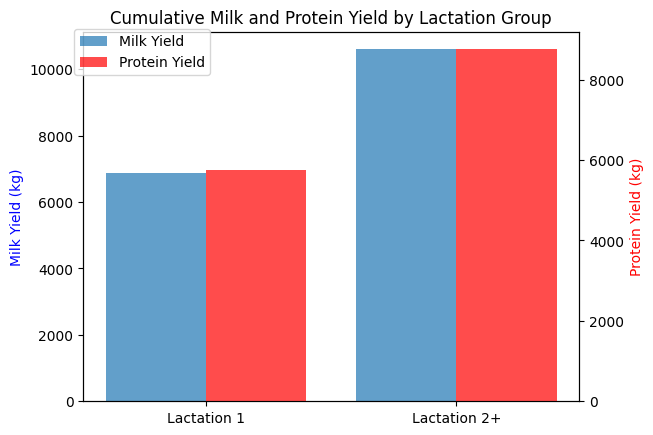

In [ ]:
# Load the sheets into dataframes
dairyplan_df = pd.read_excel(xls, sheet_name='dairyplan25')
scc_df = pd.read_excel(xls, sheet_name='SCC')

# Display the first few rows of each dataframe to understand the structure
dairyplan_df.head(), scc_df.head()
# Checking for relevant column names in dairyplan_df and scc_df
dairyplan_df.columns, scc_df.columns

# Checking for actual data in the first few rows to determine relevant columns
dairyplan_df.head(20), scc_df.head(20)

# Extracting relevant data from SCC sheet

# Finding the row index where DIM (Days in Milk) starts
dim_row_idx = scc_df[scc_df.iloc[:, 3] == "DIM"].index[0]

# Extracting cumulative milk yield values from the relevant row
milk_yield_lact1 = float(scc_df.iloc[dim_row_idx + 1, 4])  # Lactation 1
milk_yield_lact2_plus = float(scc_df.iloc[dim_row_idx + 1, 5])  # Lactation 2+

# Extracting cumulative protein yield values from later rows
protein_yield_lact1 = float(scc_df.iloc[dim_row_idx + 2, 4])  # Lactation 1
protein_yield_lact2_plus = float(scc_df.iloc[dim_row_idx + 2, 5])  # Lactation 2+

# Creating a DataFrame for the extracted data
cumulative_yield_df = pd.DataFrame({
    "Lactation Group": ["Lactation 1", "Lactation 2+"],
    "Cumulative Milk Yield (kg)": [milk_yield_lact1, milk_yield_lact2_plus],
    "Cumulative Protein Yield (kg)": [protein_yield_lact1, protein_yield_lact2_plus]
})

# Display the DataFrame
print(cumulative_yield_df)
import matplotlib.pyplot as plt

# Plotting cumulative milk yield and protein yield for Lactation 1 and 2+ cows
fig, ax1 = plt.subplots()

# Bar width
bar_width = 0.4
index = range(len(cumulative_yield_df))

# Plot bars for milk yield
ax1.bar(index, cumulative_yield_df["Cumulative Milk Yield (kg)"], bar_width, label="Milk Yield", alpha=0.7)
ax1.set_ylabel("Milk Yield (kg)", color="blue")

# Creating a secondary y-axis for protein yield
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in index], cumulative_yield_df["Cumulative Protein Yield (kg)"], bar_width, label="Protein Yield", color="red", alpha=0.7)
ax2.set_ylabel("Protein Yield (kg)", color="red")

# Labels and title
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(cumulative_yield_df["Lactation Group"])
plt.title("Cumulative Milk and Protein Yield by Lactation Group")

# Legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()



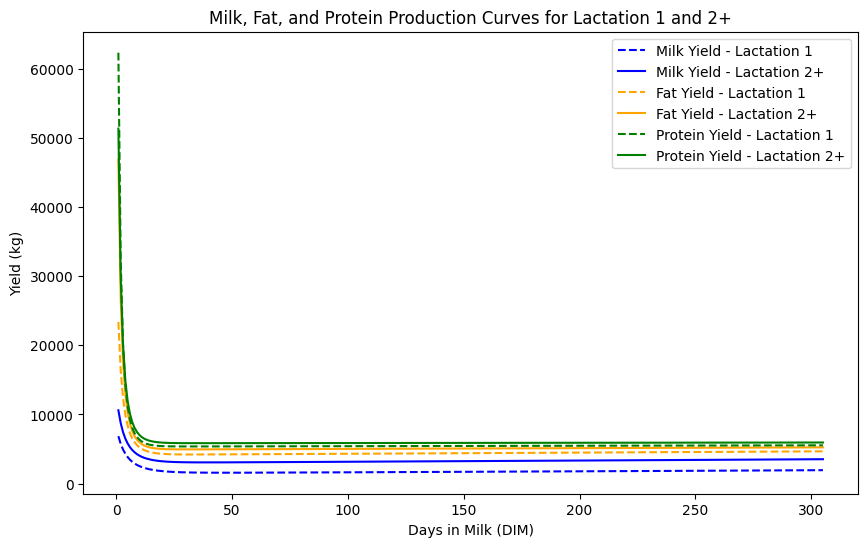

In [ ]:
# Extracting the relevant rows for production curves
# Assuming the DIM row marks the start of time-series data

dim_start_idx = dim_row_idx + 1  # Start of lactation data

# Extracting DIM (Days in Milk) values
dim_values = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 3].astype(float)  # Up to 305 days

# Extracting milk, fat, and protein production curves for Lactation 1 and 2+
milk_lact1 = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 4].astype(float)
milk_lact2_plus = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 5].astype(float)

fat_lact1 = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 6].astype(float)
fat_lact2_plus = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 7].astype(float)

protein_lact1 = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 8].astype(float)
protein_lact2_plus = scc_df.iloc[dim_start_idx:dim_start_idx + 305, 9].astype(float)

# Plotting the production curves
plt.figure(figsize=(10, 6))

# Plot for milk yield
plt.plot(dim_values, milk_lact1, label="Milk Yield - Lactation 1", color="blue", linestyle="--")
plt.plot(dim_values, milk_lact2_plus, label="Milk Yield - Lactation 2+", color="blue")

# Plot for fat yield
plt.plot(dim_values, fat_lact1, label="Fat Yield - Lactation 1", color="orange", linestyle="--")
plt.plot(dim_values, fat_lact2_plus, label="Fat Yield - Lactation 2+", color="orange")

# Plot for protein yield
plt.plot(dim_values, protein_lact1, label="Protein Yield - Lactation 1", color="green", linestyle="--")
plt.plot(dim_values, protein_lact2_plus, label="Protein Yield - Lactation 2+", color="green")

# Labels and title
plt.xlabel("Days in Milk (DIM)")
plt.ylabel("Yield (kg)")
plt.title("Milk, Fat, and Protein Production Curves for Lactation 1 and 2+")
plt.legend()
plt.grid(False)

# Show plot
plt.show()
